# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# This is a tool that we'll need later for our plot titles
import datetime

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Define the base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Add the api-key to our base url
url = url + "&appid=" + weather_api_key
# Adjust the units since we don't want to default into Kelvin
url = url + "&units=imperial"

In [5]:
# Create a count variable for the logging output
# Create a dictionary to temporarily hold the output from the API calls
count = 0
data_storage = {"City":[], "Lat":[],"Lng":[],"Max Temp":[],"Humidity":[],"Cloudiness":[],"Wind Speed":[],"Country":[],"Date":[]}

print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    try:
        # Add the city to the base url
        query_url = url + "&q=" + city
        weather = requests.get(query_url).json()
        
        # Obtain each of the datapoints from the json structure that was returned
        data_storage['Lat'].append(weather['coord']['lat'])
        data_storage['Lng'].append(weather['coord']['lon'])
        data_storage['Max Temp'].append(weather['main']['temp_max'])
        data_storage['Humidity'].append(weather['main']['humidity'])
        data_storage['Cloudiness'].append(weather['clouds']['all'])
        data_storage['Wind Speed'].append(weather['wind']['speed'])
        data_storage['Country'].append(weather['sys']['country'])
        data_storage['Date'].append(weather['dt'])
        data_storage['City'].append(city)
        
        # Iterate count for printing the number only if we get a valid city then print our log
        count += 1
        print('Processing City Number ' + str(count) + ": " + city)
    except:
        # Let the user know a city wasn't found.
        print('City Not Found. Moving to next City.')
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginning Data Retrieval
-----------------------------
Processing City Number 1: harper
Processing City Number 2: barrow
Processing City Number 3: east london
Processing City Number 4: maniitsoq
Processing City Number 5: velikiy ustyug
Processing City Number 6: albany
Processing City Number 7: praia
City Not Found. Moving to next City.
Processing City Number 8: sao filipe
Processing City Number 9: aasiaat
Processing City Number 10: mataura
Processing City Number 11: atuona
Processing City Number 12: port alfred
Processing City Number 13: sungaipenuh
Processing City Number 14: sitka
Processing City Number 15: bayan
Processing City Number 16: lompoc
Processing City Number 17: vanimo
Processing City Number 18: salalah
Processing City Number 19: saint anthony
Processing City Number 20: punta arenas
Processing City Number 21: hermanus
Processing City Number 22: norman wells
Processing City Number 23: busselton
City Not Found. Moving to next City.
Processing City Number 24: poum
City Not Fou

Processing City Number 198: ukiah
Processing City Number 199: mount darwin
Processing City Number 200: arlit
Processing City Number 201: poronaysk
Processing City Number 202: bredasdorp
Processing City Number 203: buchanan
Processing City Number 204: maceio
Processing City Number 205: kruisfontein
Processing City Number 206: vila velha
Processing City Number 207: kamenka
Processing City Number 208: upata
Processing City Number 209: longyearbyen
Processing City Number 210: ilulissat
Processing City Number 211: iquitos
Processing City Number 212: chokurdakh
Processing City Number 213: oktyabrskoye
Processing City Number 214: churapcha
Processing City Number 215: cortez
City Not Found. Moving to next City.
Processing City Number 216: izumo
Processing City Number 217: samarai
Processing City Number 218: kununurra
Processing City Number 219: bengkulu
Processing City Number 220: lanivtsi
Processing City Number 221: antalya
Processing City Number 222: faanui
Processing City Number 223: adrar


Processing City Number 404: urmary
Processing City Number 405: namatanai
Processing City Number 406: itaqui
Processing City Number 407: tomatlan
Processing City Number 408: sambava
Processing City Number 409: marienburg
Processing City Number 410: skovorodino
Processing City Number 411: victoria
City Not Found. Moving to next City.
Processing City Number 412: wakkanai
Processing City Number 413: san policarpo
Processing City Number 414: asau
Processing City Number 415: itirucu
Processing City Number 416: basco
Processing City Number 417: kupang
Processing City Number 418: sao gabriel da cachoeira
Processing City Number 419: ormara
Processing City Number 420: parsabad
Processing City Number 421: belaya gora
Processing City Number 422: wladyslawowo
Processing City Number 423: high level
Processing City Number 424: sept-iles
Processing City Number 425: kurmanayevka
Processing City Number 426: yulara
Processing City Number 427: kilemary
Processing City Number 428: saint george
Processing C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Check to make sure that we collected the same number of datapoints into all of our keys
# Can't create a dataframe from the data if the columns are of unequal length
for key in data_storage:
    print(len(data_storage[key]))

572
572
572
572
572
572
572
572
572


In [7]:
# Initialize the dataframe from the dictionary we created earlier and visualize it
weather_df = pd.DataFrame(data_storage)
# Write our dataframe to a csv file in the current folder
weather_df.to_csv('Weather_Check.csv')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,harper,4.38,-7.72,77.72,88,99,5.28,LR,1603942061
1,barrow,71.29,-156.79,23.00,79,90,6.93,US,1603941974
2,east london,-33.02,27.91,68.27,84,96,6.31,ZA,1603941861
3,maniitsoq,65.42,-52.90,21.94,83,78,3.13,GL,1603942061
4,velikiy ustyug,60.76,46.31,42.01,93,100,6.44,RU,1603942061


In [8]:
# Create a summary statistics table for our dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.627115,22.304073,58.232885,73.715035,50.580420,7.653304,1.603942e+09
std,33.414389,90.600439,22.128334,20.346497,40.899589,5.411921,1.189744e+02
min,-54.800000,-175.200000,-6.360000,7.000000,0.000000,0.340000,1.603941e+09
25%,-7.792500,-59.905000,44.085000,62.000000,1.000000,3.665000,1.603942e+09
50%,23.730000,28.500000,63.285000,79.000000,55.000000,6.710000,1.603942e+09
75%,47.912500,104.500000,77.000000,89.000000,90.000000,10.290000,1.603942e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,43.730000,1.603942e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# We inspect the data and see that in the humidity column the Max is 100. Therefore we won't have any cities to remove

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
# Calculate the date from the Unix Timestamp provided
# Notice that all the dates are similar, ust timestamps from the same day
# So we will take the date and use it in our plot titles

month = datetime.date.fromtimestamp(data_storage['Date'][0]).month
day = datetime.date.fromtimestamp(data_storage['Date'][0]).day
year = datetime.date.fromtimestamp(data_storage['Date'][0]).year
date = "(" + str(month) + "/" + str(day) + "/" + str(year) + ")"

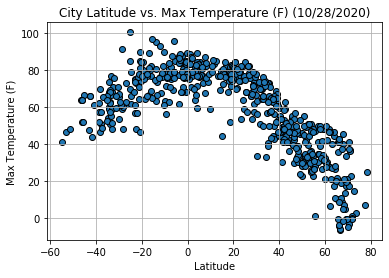

In [13]:
# Plot the data and adjust lables and title as appropriate
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (F) ' + date)
plt.show()

### City Latitude v Max Temperature
* This plot depicts the max temperature of a place relative to its longitude (distance from the equator). There is a clear trend that shows increasing temperature as you go closer to the equator at Latitude = 0.
* There is also a clear demonstration of the fact that more of the northern hemisphere is populated than the southern. There are more cities on the right side of the plot and they extend further away from the centerline. This means places closer to the north pole were selected. This may be an aberration of the specific points we chose, however, numerous runs of this data show a similar trend indicating that there are more cities that can be found in the northern artic regions than in the southern polar region. Just looking at a map this makes sense because the arctic circle is mostly land while the area around Antarctica is almost entirely ocean.

## Latitude vs. Humidity Plot

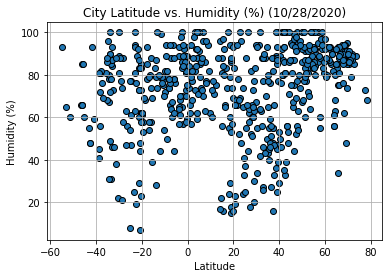

In [14]:
# Plot the data and adjust lables and title as appropriate
plt.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%) ' + date)
plt.show()

### City Latitude v Humidity
* This plot demonstrates the relationship between latitude and humidty.
* There are two notable clusters: around Latitude = 0 and around Latitude 60.
* These clusters are two distinct climates, the tropics around the equator and "Humid Continental." The latter occurs within large land masses far from oceans and far from the equator (but before the temperature turns too cold and everyhting turns to precipitation). This occurs only in the northern hemisphere because there aren't huge landmasses in the southern hemishpere.

## Latitude vs. Cloudiness Plot

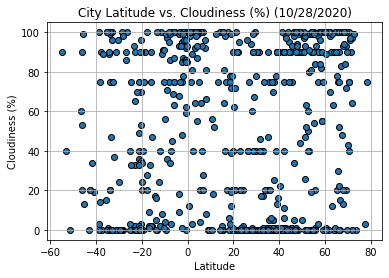

In [15]:
# Plot the data and adjust lables and title as appropriate
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%) ' + date)
plt.show()

### Latitude v Cloudiness
* This plot demonstrates the relationship between latitude and the level of cloud cover.
* There does not appear to be a significant trend over latitude.
* The only trends we can really see in this data are related to how cloud cover is measured. There appear to be bands of values (0,20,40,~75,~88,100). This might indicate that the cloud cover percentage isn't a continuous variable but is instead a quantized variable.

## Latitude vs. Wind Speed Plot

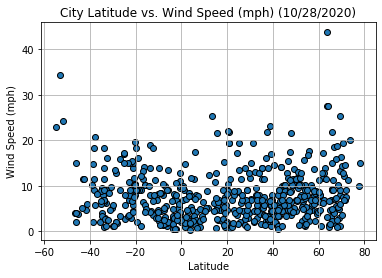

In [16]:
# Plot the data and adjust lables and title as appropriate
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph) ' + date)
plt.show()

### City Latitude v Wind Speed
* This graph displays the relationship between latitude and wind speed.
* There appears to be no clear trend between the two variables except that the earth has a relatively constant low wind speed nearly everywhere with a few much higher outliers.

## Linear Regression

In [17]:
# Create our northern and southern hemisphere dataframes
north_df = weather_df.loc[weather_df['Lat'] >= 0,:]
south_df = weather_df.loc[weather_df['Lat'] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.8753797760697707


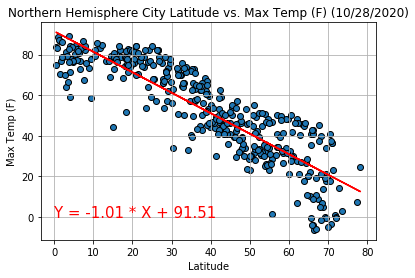

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'],north_df['Max Temp'])
yvals = round(slope,2) * north_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(north_df['Lat'],north_df['Max Temp'],edgecolors = 'black')
plt.plot(north_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere City Latitude vs. Max Temp (F) ' + date)
plt.annotate(line_name, (0,0),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.6485823598821405


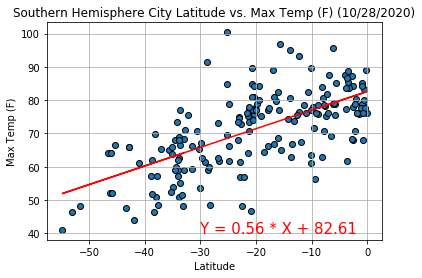

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'],south_df['Max Temp'])
yvals = round(slope,2) * south_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(south_df['Lat'],south_df['Max Temp'],edgecolors = 'black')
plt.plot(south_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere City Latitude vs. Max Temp (F) ' + date)
plt.annotate(line_name, (-30,40),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.2440616147551027


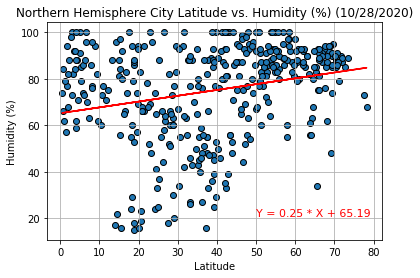

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'],north_df['Humidity'])
yvals = round(slope,2) * north_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(north_df['Lat'],north_df['Humidity'],edgecolors = 'black')
plt.plot(north_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Latitude vs. Humidity (%) ' + date)
plt.annotate(line_name, (50,21),fontsize=11,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.1456210900926962


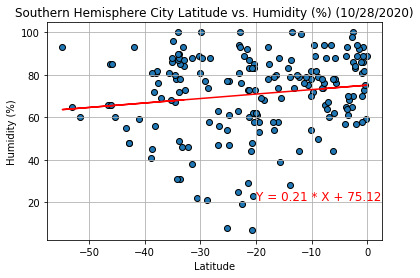

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'],south_df['Humidity'])
yvals = round(slope,2) * south_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(south_df['Lat'],south_df['Humidity'],edgecolors = 'black')
plt.plot(south_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Latitude vs. Humidity (%) ' + date)
plt.annotate(line_name, (-20,21),fontsize=12,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.10040732136746411


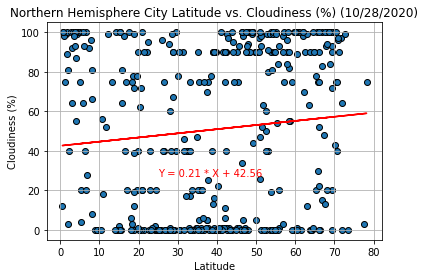

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'],north_df['Cloudiness'])
yvals = round(slope,2) * north_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(north_df['Lat'],north_df['Cloudiness'],edgecolors = 'black')
plt.plot(north_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness (%) ' + date)
plt.annotate(line_name, (25,27),fontsize=10,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.24121674709883498


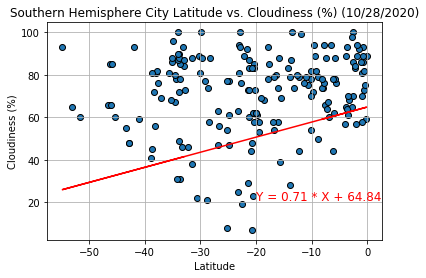

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'],south_df['Cloudiness'])
yvals = round(slope,2) * south_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(south_df['Lat'],south_df['Humidity'],edgecolors = 'black')
plt.plot(south_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness (%) ' + date)
plt.annotate(line_name, (-20,21),fontsize=12,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.19707095449884376


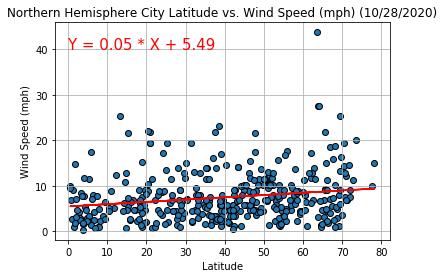

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'],north_df['Wind Speed'])
yvals = round(slope,2) * north_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(north_df['Lat'],north_df['Wind Speed'],edgecolors = 'black')
plt.plot(north_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed (mph) ' + date)
plt.annotate(line_name, (0,40),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.2869061252737685


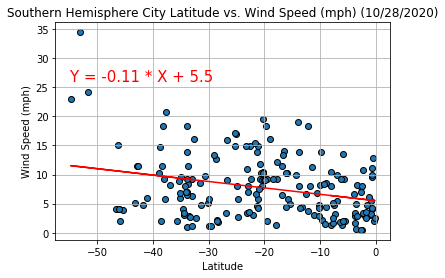

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'],south_df['Wind Speed'])
yvals = round(slope,2) * south_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(south_df['Lat'],south_df['Wind Speed'],edgecolors = 'black')
plt.plot(south_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed (mph) ' + date)
plt.annotate(line_name, (-55,26),fontsize=15,color="red")
plt.show()